# Predicting Employee Productivity Using Tree Models

We're predicting features of workers productivity using a machine learning model of Decision Tree and Random Forest Modeling in Python. We'll be using a 3-month garment employees prodcutivity dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees)

In [196]:
import pandas as pd
df = pd.read_csv('garments_worker_productivity.csv')
df.head(20)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

* 15 columns, 1197 entries with numerical and categorical values.
* At first glance, only `wip` has missing values.

We have a countable number of columns. Let's explore and clean them.

## Exploratory Data Analysis and Data Cleaning

In [198]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


##### Note:

###### 🫳 = Not that useful for ML training. Drop it?

###### 🧹 = Data cleaned. Noice.

###### ✏️ = Some good insights. Noted.

##### `date` : Date in MM-DD-YYYY 🫳

In [199]:
df['date'].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

In [200]:
df['date'].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

> The `date` only ranges for 3 months. If it ranges for a year, we can categorize it based on seasons to check for seasonal tendencies.

##### `quarter` : Portion of the month (divided into four quarters) 🧹

In [201]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [202]:
df[df['quarter'] == 'Quarter5']['date'].value_counts()

1/31/2015    24
1/29/2015    20
Name: date, dtype: int64

> There are 5 quarters, with Quarter5 includes 5th week of January (29-31). We can include them in `Quarter4`
>> We can also change the values to 1-4 for easier classification in the model training

------------

In [203]:
df.loc[df['quarter'] == 'Quarter5', 'quarter'] = 'Quarter4'

In [204]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

------------

In [205]:
df['quarter'] = df['quarter'].replace(
                  {'Quarter1': 1, 'Quarter2': 2,
                   'Quarter3': 3, 'Quarter4': 4}).astype(int)

In [206]:
print(df['quarter'].dtypes)
print(df['quarter'].value_counts())

int64
1    360
2    335
4    292
3    210
Name: quarter, dtype: int64


##### `day` : Day of the week

In [207]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

> There are no value of `Friday`. 
>> Could it mean that the factory is closed on Fridays?

##### `department` : Associated department with the instance 🧹

In [208]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

> Two finishing values.
>> One may have a hidden space after. We'll change it if so.

In [209]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

-----------

In [210]:
df.loc[df['department'] == 'finishing ', 'department'] = 'finishing'

In [211]:
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

##### `team` : Associated team number with the instance

In [212]:
df['team'].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

> 12 teams with number of 1-12 (categorical), the distribution seems fair.

##### `targeted_productivity` and `actual_productivity` : Targeted and actual productivity set by the authority for each team on each day 🧹✏️

> Let's check entries whose productivity have (1) exceeded, (2) reached, and (3) failed to meet target.

In [213]:
# (1) Entries exceeding target
df[ df['actual_productivity'] > df['targeted_productivity'] ]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [214]:
# (2) Entries reaching target
df[ df['actual_productivity'] == df['targeted_productivity'] ]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


In [215]:
# (3) Entries failed meeting the target
df[ df['actual_productivity'] < df['targeted_productivity'] ]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


> Regarding target productivity:
> * 869 exceeds,
> * 6 reaches, and
> * 322 fails to meet.

> `actual_productivity` seems to have a range of ([0..1]), but there are several entries that do exceed 1.

>  And both columns also have different digits; targeted ones with 2 and actual ones with 6. We can clean it for coherency.

In [216]:
print(df[df['actual_productivity'] > 1].shape[0])
df[df['actual_productivity'] > 1]

37


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,4,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,4,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,4,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


-------------

In [217]:
df['actual_productivity'] = round(df['actual_productivity'], 2)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.94
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.89
2,1/1/2015,1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.80
3,1/1/2015,1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.80
4,1/1/2015,1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.80


##### `smv`: standard minute value--the allocated time for a task

In [218]:
df['smv'].value_counts().sort_index()

2.90     108
3.90      20
3.94     192
4.08      21
4.15      76
        ... 
49.10      1
50.48      2
50.89      1
51.02      1
54.56      1
Name: smv, Length: 70, dtype: int64

In [219]:
# Grouping them into intervals of 10
df['smv'].value_counts(bins=6, sort=False)

(2.847, 11.51]    542
(11.51, 20.12]    172
(20.12, 28.73]    324
(28.73, 37.34]    141
(37.34, 45.95]      8
(45.95, 54.56]     10
Name: smv, dtype: int64

> Most garments spend roughly 2.8-11.5 minutes to get done.

##### `wip` : Work in progress -- the number of unfinished items for products 🫳

In [220]:
print(df['wip'].isnull().sum())
df['wip'].value_counts(bins=30, sort=False)

506


(-16.116, 777.5]      174
(777.5, 1548.0]       467
(1548.0, 2318.5]       40
(2318.5, 3089.0]        2
(3089.0, 3859.5]        0
(3859.5, 4630.0]        0
(4630.0, 5400.5]        0
(5400.5, 6171.0]        0
(6171.0, 6941.5]        0
(6941.5, 7712.0]        0
(7712.0, 8482.5]        0
(8482.5, 9253.0]        1
(9253.0, 10023.5]       1
(10023.5, 10794.0]      0
(10794.0, 11564.5]      0
(11564.5, 12335.0]      1
(12335.0, 13105.5]      0
(13105.5, 13876.0]      0
(13876.0, 14646.5]      0
(14646.5, 15417.0]      0
(15417.0, 16187.5]      0
(16187.5, 16958.0]      1
(16958.0, 17728.5]      0
(17728.5, 18499.0]      0
(18499.0, 19269.5]      0
(19269.5, 20040.0]      0
(20040.0, 20810.5]      0
(20810.5, 21581.0]      3
(21581.0, 22351.5]      0
(22351.5, 23122.0]      1
Name: wip, dtype: int64

> The ranges are extreme. There are also 506 null values. We may consider dropping it.

##### `over_time` : the amount of overtime by each team (in minutes) ✏️

In [221]:
df['over_time'].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

In [222]:
## Taking threshold: 3960
df[df['over_time'] > 3960]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.94
5,1/1/2015,1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.80
7,1/1/2015,1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.75
8,1/1/2015,1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.75
9,1/1/2015,1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.75
1188,3/11/2015,2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.70
1189,3/11/2015,2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.70
1190,3/11/2015,2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.70


In [223]:
## Another observations: 0
print(df[df['over_time'] == 0].shape[0])
df[df['over_time'] == 0]

31


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.75
694,2/10/2015,2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.90
695,2/10/2015,2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.90
696,2/10/2015,2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.90
697,2/10/2015,2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.90
713,2/11/2015,2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.00
714,2/11/2015,2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.00
718,2/11/2015,2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.85
730,2/12/2015,2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.10
732,2/12/2015,2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.00


> 31 cases of `over_time == 0`. Rare cases of no overtime, huh?

> *"Are there entries that has no overtime and somehow exceeds `targeted_productivity`?"*

In [224]:
mask = ( (df['over_time'] == 0) & 
         (df['actual_productivity'] > df['targeted_productivity']) )
print(df[mask].shape[0])
df[mask]

15


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
694,2/10/2015,2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.90
695,2/10/2015,2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.90
696,2/10/2015,2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.90
697,2/10/2015,2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.90
713,2/11/2015,2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.00
714,2/11/2015,2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.00
718,2/11/2015,2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.85
730,2/12/2015,2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.10
732,2/12/2015,2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.00
1128,3/9/2015,2,finishing,Monday,11,0.80,2.90,NaN,0,960,0.0,0,0,8.0,0.96


> 24 out of 31 in 1000+ entries. So it *is* rare to ***exceed targets*** and also ***not having overtime*** 

##### `incentive` : The amount of financial incentive in BDT ✏️ 
###### *(1 Bangladeshi Taka = 9.1 cents)* 

In [225]:
df['incentive'].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

> Hm. Seems like most of the teams are unpaid. Let's see the numbers.

In [226]:
print(df[df['incentive'] == 0].shape[0]) # Entries
print(df[df['incentive'] == 0].shape[0] / df.shape[0] * 100) # Percentages
df[df['incentive'] == 0]

604
50.45948203842941


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.89
6,1/1/2015,1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.76
13,1/1/2015,1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.71
14,1/1/2015,1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.68
15,1/1/2015,1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.63
1193,3/11/2015,2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.63
1194,3/11/2015,2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.63
1195,3/11/2015,2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.51


In [227]:
# Checking entries on a threshold: 10
print(df[df['incentive'] > 50].shape[0]) # Entries
print(df[df['incentive'] > 50].shape[0] / df.shape[0] * 100) # Percentages
df[df['incentive'] > 50]

231
19.298245614035086


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.94
27,1/3/2015,1,sweing,Saturday,12,0.80,26.16,844.0,7080,63,0.0,0,0,59.0,0.80
32,1/3/2015,1,sweing,Saturday,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.79
45,1/4/2015,1,sweing,Sunday,9,0.80,26.16,1278.0,7080,60,0.0,0,0,59.0,0.85
46,1/4/2015,1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3/10/2015,2,sweing,Tuesday,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0.85
1158,3/10/2015,2,sweing,Tuesday,12,0.80,15.26,1069.0,4080,63,0.0,0,0,34.0,0.80
1159,3/10/2015,2,sweing,Tuesday,3,0.80,30.10,756.0,6960,63,0.0,0,1,58.0,0.80
1178,3/11/2015,2,sweing,Wednesday,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.80


In [228]:
# Checking entries on a threshold: 10
print(df[df['incentive'] > 100].shape[0]) # Entries
print(df[df['incentive'] > 100].shape[0] / df.shape[0] * 100) # Percentages
df[df['incentive'] > 100]

34
2.8404344193817876


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
456,1/27/2015,4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.00
457,1/27/2015,4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.00
478,1/28/2015,4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.00
498,1/29/2015,4,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.00
518,1/31/2015,4,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.00
519,1/31/2015,4,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.00
543,2/1/2015,1,sweing,Sunday,2,0.80,22.52,1396.0,6900,113,0.0,0,0,57.5,1.00
544,2/1/2015,1,sweing,Sunday,1,0.80,22.94,1582.0,3060,113,0.0,0,0,58.5,1.00
561,2/2/2015,1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.00
581,2/3/2015,1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.00


> Indeed ***more than half*** (604 entries) of the entries are unpaid.
>> * Compared to other, there are 231 entries paid with `incentive > 50`
>> * And there are only 34 entries with `incentive > 100`

##### `idle_time` and `idle_men`: the duration of idle time and also the number of idle workers due to an interruption of production 🫳

In [229]:
print(df[df['idle_time'] > 0].shape[0])
df[df['idle_time'] > 0]

18


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.65
617,2/4/2015,1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.35
650,2/7/2015,1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.66
654,2/7/2015,1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.37
775,2/15/2015,3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.70
798,2/16/2015,3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.62
818,2/17/2015,3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.60
822,2/17/2015,3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.30
841,2/18/2015,3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.30
843,2/18/2015,3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.25


In [230]:
# Sanity check: Is it the same?
print(df[df['idle_men'] > 0].shape[0])
df[df['idle_men'] > 0]

18


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.65
617,2/4/2015,1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.35
650,2/7/2015,1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.66
654,2/7/2015,1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.37
775,2/15/2015,3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.70
798,2/16/2015,3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.62
818,2/17/2015,3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.60
822,2/17/2015,3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.30
841,2/18/2015,3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.30
843,2/18/2015,3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.25


> There are only 18 incidences where the production is interrupted. It's minor compared to the whole dataset.

##### `no_of_style_change` : number of changes in the style of a particular product 🫳

In [231]:
df['no_of_style_change'].describe()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

In [232]:
# Style change: 1
print(df[df['no_of_style_change'] == 1].shape[0])
df[df['no_of_style_change'] == 1]

114


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
634,2/5/2015,1,sweing,Thursday,4,0.50,30.10,417.0,6360,23,0.0,0,1,53.0,0.50
651,2/7/2015,1,sweing,Saturday,4,0.60,30.10,486.0,6780,30,0.0,0,1,57.0,0.60
671,2/8/2015,2,sweing,Sunday,4,0.65,30.10,712.0,6780,44,0.0,0,1,56.5,0.57
683,2/9/2015,2,sweing,Monday,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.79
689,2/9/2015,2,sweing,Monday,7,0.35,30.10,842.0,6960,0,0.0,0,1,58.0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.75
1188,3/11/2015,2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.70
1189,3/11/2015,2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.70
1190,3/11/2015,2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.70


In [233]:
# Style change: 2
print(df[df['no_of_style_change'] == 2].shape[0])
df[df['no_of_style_change'] == 2]

33


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
744,2/12/2015,2,sweing,Thursday,11,0.50,11.41,1039.0,2280,0,0.0,0,2,55.0,0.50
761,2/14/2015,2,sweing,Saturday,11,0.60,11.41,1039.0,2280,23,0.0,0,2,55.0,0.60
777,2/15/2015,3,sweing,Sunday,11,0.65,11.41,700.0,2640,23,0.0,0,2,53.0,0.65
798,2/16/2015,3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.62
799,2/16/2015,3,sweing,Monday,11,0.70,11.41,680.0,2160,30,0.0,0,2,54.0,0.57
813,2/17/2015,3,sweing,Tuesday,11,0.70,11.41,1054.0,3420,30,0.0,0,2,56.0,0.70
818,2/17/2015,3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.60
826,2/18/2015,3,sweing,Wednesday,11,0.70,11.41,685.0,3360,30,0.0,0,2,56.0,0.82
843,2/18/2015,3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.25
854,2/19/2015,3,sweing,Thursday,11,0.70,11.41,653.0,3480,30,0.0,0,2,58.0,0.70


> Most entries do not have data entries (`0`). Only 114 has `1` and 33 has `2`. 

##### `no_of_workers` : number of workers on each team

In [234]:
df['no_of_workers'].describe()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

In [235]:
# Picking threshold: 57
df[df['no_of_workers'] > 57]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.94
7,1/1/2015,1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.75
9,1/1/2015,1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.75
10,1/1/2015,1,sweing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.72
17,1/1/2015,1,sweing,Thursday,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,3/11/2015,2,sweing,Wednesday,3,0.80,30.10,735.0,6960,63,0.0,0,1,58.0,0.80
1180,3/11/2015,2,sweing,Wednesday,11,0.80,11.41,560.0,3420,50,0.0,0,0,58.0,0.80
1186,3/11/2015,2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.75
1187,3/11/2015,2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.75


In [236]:
# Sanity check: Picking threshold -- 0
df[df['no_of_workers'] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [237]:
bins = [0, 15, 30, 45, 60, 75, 90]
df['no_of_workers'].value_counts(bins=bins, sort=False)

(-0.001, 15.0]    455
(15.0, 30.0]       55
(30.0, 45.0]      126
(45.0, 60.0]      560
(60.0, 75.0]        0
(75.0, 90.0]        1
Name: no_of_workers, dtype: int64

> The dataset consists of mostly `45-60` workers (560 entries), followed `2-15` workers (455 entries).

### Removing Unnecessary Columns

Now we've explored and clean several data, we can remove columns that may go unrelated for the tree model. The reasons vary from minor non-zero values, up to extreme distribution. From the exploration, we can drop `date', 'wip', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'`

In [238]:
df = df.drop(['date', 'wip', 'idle_time', 'idle_men', 
              'no_of_style_change'], axis=1)

In [239]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.89
2,1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.80
3,1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.80
4,1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.80


### More Data Cleaning: Labeling and Categorical Dummies

Now we've cleaned the dataset, we can infer a new data from a comparison of values. Take both values of `targeted_productivity` and `actual_productivity`, for instance, to make a new information if an entry is `productive`.

Also, in order for us to apply the model on categorical values, we need to separate each categorical values in columns. We can use `pd.get_dummies()` for multiple categories or changing values to `0` and `1` for two categorical values.. 

#### Labeling: `productive`

In [240]:
df['productive'] = df['actual_productivity'] >= df['targeted_productivity']
df.sample(10, random_state = 22)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
258,2,finishing,Wednesday,2,0.80,3.94,1260,0,8.0,0.25,False
494,4,sweing,Wednesday,6,0.35,18.79,1800,23,32.0,0.44,True
133,2,sweing,Thursday,8,0.80,25.90,10170,60,56.5,0.85,True
575,1,finishing,Monday,1,0.75,3.94,2280,0,19.0,0.50,False
1046,1,sweing,Tuesday,2,0.40,15.28,5400,0,45.0,0.30,False
193,2,finishing,Monday,1,0.80,3.94,1440,0,8.0,0.96,True
97,1,sweing,Tuesday,8,0.80,25.90,10170,38,56.5,0.80,True
28,1,sweing,Saturday,11,0.80,11.61,7080,50,29.5,0.80,True
954,4,sweing,Thursday,2,0.70,30.33,6960,0,58.0,0.66,False
872,4,sweing,Sunday,6,0.75,18.79,3960,45,33.0,0.75,True


We can reorder the column to make the dataset easier to read.

In [241]:
df = df[['quarter', 'day', 'department', 'team', 'no_of_workers',
         'targeted_productivity', 'actual_productivity', 'productive', 
         'over_time', 'smv', 'incentive']]
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59.0,0.80,0.94,True,7080,26.16,98
1,1,Thursday,finishing,1,8.0,0.75,0.89,True,960,3.94,0
2,1,Thursday,sweing,11,30.5,0.80,0.80,True,3660,11.41,50
3,1,Thursday,sweing,12,30.5,0.80,0.80,True,3660,11.41,50
4,1,Thursday,sweing,6,56.0,0.80,0.80,True,1920,25.90,50


#### Labeling: `department` to `dept_sweing`

In [242]:
# Department: `sewing` = 1, `finishing` = 0
df['department'] = df['department'].apply(lambda x: 1 if x == 'sweing' else 0)
# Rename the column to grant a new information of values
df.rename(columns = {'department': 'dept_sweing'}, inplace=True)

In [243]:
df.sample(10)

,quarter,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
695,2,Tuesday,1,1,57.0,0.80,0.90,True,0,22.52,88
599,1,Wednesday,1,2,57.5,0.80,1.05,True,6900,22.52,100
111,1,Wednesday,0,2,8.0,0.80,0.81,True,1440,3.94,0
873,4,Sunday,0,1,12.0,0.80,0.73,False,2880,3.94,0
831,3,Wednesday,1,6,33.0,0.75,0.75,True,3960,18.79,34
605,1,Wednesday,1,1,57.5,0.80,0.90,True,6900,22.52,88
383,4,Thursday,0,1,25.0,0.70,0.65,False,15000,3.94,0
86,1,Tuesday,0,11,15.0,0.80,0.89,True,2700,4.15,0
538,4,Saturday,1,11,54.0,0.65,0.65,True,6480,20.10,49
1159,2,Tuesday,1,3,58.0,0.80,0.80,True,6960,30.10,63


-------------

#### `pd.get_dummies()`

##### `day` : Turning 1 into 6 new columns of each `day`

In [244]:
df_day = pd.get_dummies(df['day'], prefix=None)
df = pd.concat([df, df_day], axis=1).drop(['day'], axis=1)
df.sample(10, random_state = 25)

,quarter,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1163,2,1,9,52.0,0.75,0.75,True,6240,18.79,45,0,0,0,0,1,0
421,4,0,4,12.0,0.75,0.95,True,2160,4.30,0,0,0,1,0,0,0
278,3,0,5,15.0,0.65,0.99,True,2700,4.15,0,0,1,0,0,0,0
461,4,1,10,56.0,0.80,0.90,True,6720,22.52,70,0,0,0,0,1,0
314,3,1,5,58.0,0.60,0.60,True,10440,20.40,30,0,0,1,0,0,0
16,1,0,7,8.0,0.80,0.54,False,960,2.90,0,0,0,0,1,0,0
874,4,1,8,57.0,0.70,0.70,True,6840,29.40,40,0,0,1,0,0,0
162,2,1,1,59.0,0.80,0.80,True,10620,26.16,63,0,1,0,0,0,0
477,4,1,2,57.0,0.80,1.00,True,6840,22.52,90,0,0,0,0,0,1
387,4,1,7,57.0,0.60,0.60,True,10260,22.52,23,0,0,0,1,0,0


##### `quarter`: Changing 1 into 4 columns of each `quarter`

In [246]:
df_quarter = pd.get_dummies(df['quarter'], prefix='q')
df = pd.concat([df, df_quarter], axis=1).drop(['quarter'], axis=1)
df.sample(10, random_state = 20)

,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,q_1,q_2,q_3,q_4
700,1,12,34.0,0.80,0.80,True,4080,15.26,50,0,0,0,0,1,0,0,1,0,0
359,1,10,56.0,0.70,0.80,True,10080,22.52,75,0,0,0,0,0,1,0,0,1,0
666,1,6,33.0,0.75,0.75,True,3960,18.79,34,0,0,1,0,0,0,0,1,0,0
337,0,5,8.0,0.70,1.03,True,1440,4.15,0,0,0,0,0,1,0,0,0,1,0
543,1,2,57.5,0.80,1.00,True,6900,22.52,113,0,0,1,0,0,0,1,0,0,0
985,0,3,25.0,0.80,0.94,True,10500,4.60,0,0,0,1,0,0,0,1,0,0,0
729,1,11,52.0,0.35,0.51,True,3240,11.41,0,0,0,0,0,0,1,0,1,0,0
356,0,9,8.0,0.80,0.83,True,2400,3.94,0,0,0,0,0,0,1,0,0,1,0
121,1,5,58.0,0.70,0.70,True,9720,21.98,40,0,0,0,0,0,1,1,0,0,0
930,1,6,33.0,0.75,0.75,True,3960,18.79,45,0,0,0,0,0,1,0,0,0,1


##### `team` : Expanding 1 into 12 columns of each `team`

> We can also expand this column since it's categorical in sense of **team number**.

In [247]:
df_team = pd.get_dummies(df['team'], prefix='team')
df = pd.concat([df, df_team], axis=1).drop(['team'], axis=1)
df.sample(10, random_state = 25)

,dept_sweing,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,Monday,Saturday,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
1163,1,52.0,0.75,0.75,True,6240,18.79,45,0,0,...,0,0,0,0,0,0,1,0,0,0
421,0,12.0,0.75,0.95,True,2160,4.30,0,0,0,...,0,1,0,0,0,0,0,0,0,0
278,0,15.0,0.65,0.99,True,2700,4.15,0,0,1,...,0,0,1,0,0,0,0,0,0,0
461,1,56.0,0.80,0.90,True,6720,22.52,70,0,0,...,0,0,0,0,0,0,0,1,0,0
314,1,58.0,0.60,0.60,True,10440,20.40,30,0,0,...,0,0,1,0,0,0,0,0,0,0
16,0,8.0,0.80,0.54,False,960,2.90,0,0,0,...,0,0,0,0,1,0,0,0,0,0
874,1,57.0,0.70,0.70,True,6840,29.40,40,0,0,...,0,0,0,0,0,1,0,0,0,0
162,1,59.0,0.80,0.80,True,10620,26.16,63,0,1,...,0,0,0,0,0,0,0,0,0,0
477,1,57.0,0.80,1.00,True,6840,22.52,90,0,0,...,0,0,0,0,0,0,0,0,0,0
387,1,57.0,0.60,0.60,True,10260,22.52,23,0,0,...,0,0,0,0,1,0,0,0,0,0


## Building The Tree

We've totally cleaned and expanded the data into numerical values, now we can build the tree and apply the model to the dataset. We'll be importing relevant libraries from `scikit-learn`.

We're using `DecisionTreeClassifier` for the model and `productive` as the classification label (with categorical values of `True` and `False`). We're not including its precedents `actual_productivity` since it came in continuouus values, leading to regression classifier--which we're not dealing with at this project.

In [249]:
# Import relevant libraries:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

In [250]:
# Re-writing it to identify the module used
from sklearn.model_selection import train_test_split

X = df.drop(['actual_productivity', 'productive'], axis=1)
y = df['productive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                        shuffle=True, random_state=24)

In [252]:
# Assigning the model, with level of depth = 3
tree = DecisionTreeClassifier(max_depth = 3, random_state=24)
tree.fit(X_train, y_train) # Fitting the model into the dataset

DecisionTreeClassifier(max_depth=3, random_state=24)

In [255]:
y_pred = tree.predict(X_test)

from sklearn.metrics import accuracy_score
acc_test = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(acc_test * 100, 3)}')

Accuracy: 84.583


We've got an accuracy of `84.563%`. We can optimize it for better accuracy and also see how the model's applied.

## Visualizing and Evaluating the Data

In [256]:
tree.classes_   # We'll transform it to ['Unproductive', ''Productive']
                # for readable tree visualization

array([False,  True])

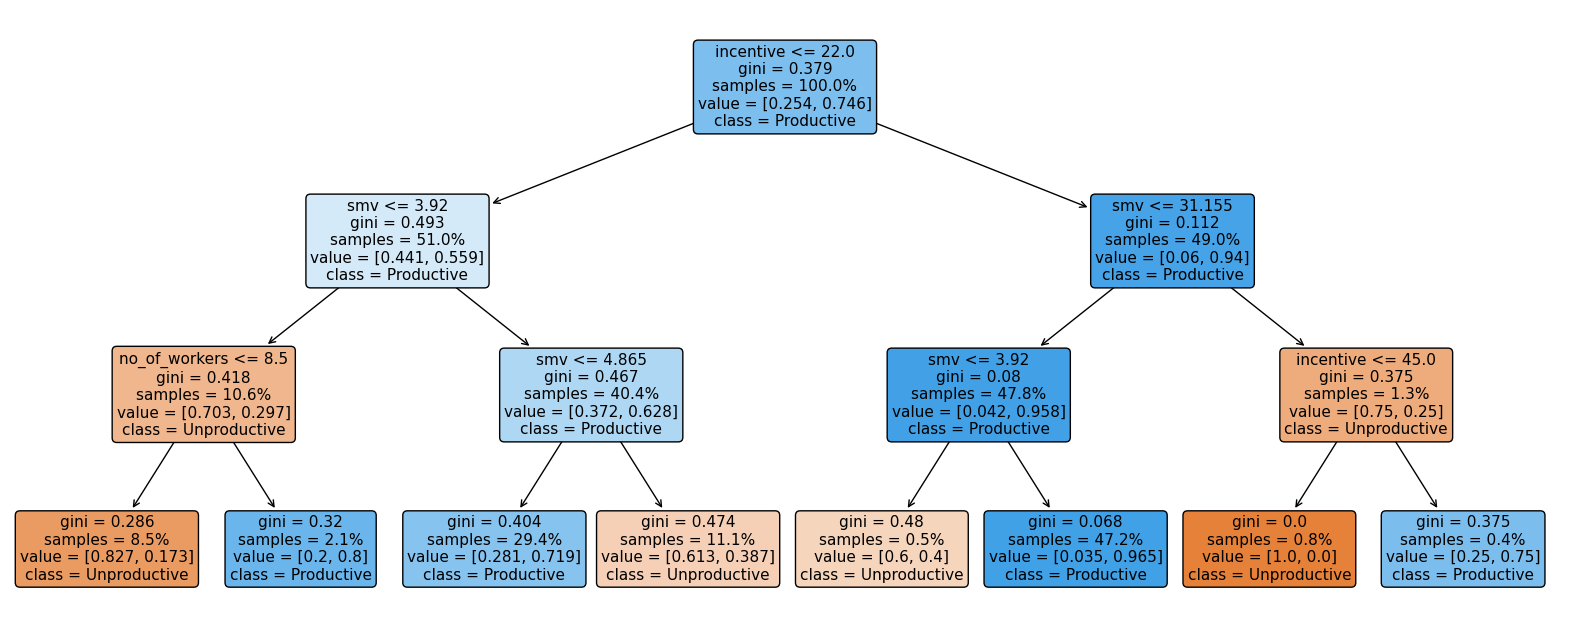

In [259]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=[20.0, 8.0])

# Plot the tree with specific parameters:
_ = plot_tree(tree, feature_names = X.columns,
              class_names = ['Unproductive', 'Productive'],
              filled = True, rounded = True, proportion = True, fontsize=11)

As we can see, most significant columns used to divide the dataset on decision tree models are `smv` and `incentive`. 

Keep in mind that we've pruned the tree to only branch three times (`max_depth = 3`). Had we pruned it more loosely, we could have another columns used for the divide.

#### **"Now, how do we interpret the tree plot above?"** 🤔

> The tree will always branch to the left if the conditions are fulfilled and to the right as non-cases when they don't. Let's start from the root node: `incentive <= 22.0`.

> We've changed the `class_names` from `[True, False]` to `[Unproductive, Productive]` for easier read on the tree plots.

> Keep in mind that the model will determine if it's `Unproductive` or `Productive` based on the least value of error. There are 4 error parameters that supports this, and here we're using a parameter called `gini` (second line on each non-leaf nodes). Take the root node: (`incentive == 25.0`), for instance. The model ill count two `gini` errors: if the class is included as `Unproductive` and `Productive`. The gini error for `Unproductive` is larger than gini error for `Productive` (`gini = 0.379`). Therefore, the node assigns the class within as `Productive`. It applies to all nodes up to the leaves.

>> When the `(incentive == 25.0) !<= 22.0`, the tree will return as non-cases and we're going down to the right branch (dark blue)

>> Now we have two best predictors with the least errors on this branch: `smv <= 3.92` and `incentive <= 45.0`

>>> Take that we have `(smv == 5) !<= 3.92`. The tree will return non-cases and we're going down to the leaf (light blue); the rightest branch.

#### **"How are we looking for the parameters of performance?"**

We can use a function from module `sklearn.metrics` called `confusion_matrix`. It returns a matrix of four fundamental components for model performance:

> `[[  True Negatives (TN), False Positives (FP) ]`

> `  [ False Negatives (FN),  True Positives (TP) ]] `

In [260]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 35,  24],
       [ 13, 168]])

We'll use this to count several parameters for evaluation performance:

> A variable to check the accuracy of positive predictions: $Precision = \frac{TP}{TP + FP}$ 

> A variable to check the completeness of positive predictions: $Recall = \frac{TP}{TP + FN}$

> A balanced variable--harmonic mean of both: $F1-Score = 2 * \frac{Precision * Recall}{Precision + Recall}$


In [262]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Accuracy: {round(accuracy_score(y_pred, y_test) * 100, 3)} %')
print(f'Precision: {round(precision_score(y_pred, y_test) * 100, 3)} %')
print(f'Recall: {round(recall_score(y_pred, y_test) * 100, 3)} %')
print(f'F1-Score: {round(f1_score(y_pred, y_test) * 100, 3)} %')

Accuracy: 84.583 %
Precision: 92.818 %
Recall: 87.5 %
F1-Score: 90.08 %


All the three parameters are superior to accuracy. We can tell that:

> The model does very good in detecting positive predictors accurately (92.818%) across the complete dataset (87.5%).

We can also use another option to evaluate our tree: [Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). It divides the dataset into blocks/folds (number of folds are determined by the `cv` parameter), iterate the algorithm on each copy, and will then return the average of accuracy scores on each copy.

In [274]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)
print(f'Cross Validation Accuracy Scores: {scores.round(2)}')
print(f'Cross Validation Mean Accuracy Score: {scores.mean().round(6)}')

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]
Cross Validation Mean Accuracy Score: 0.820322


We can also use [`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to generate several evaluation scores. Here we'll use the same parameters as previous ones.

In [267]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate( tree, X, y, cv = 10, scoring = 
                                        ('precision', 'recall', 'f1') )

In [271]:
print(f"Cross Validation Precision Scores: {multiple_cross_scores['test_precision'].round(2)}")
print(f"Cross Validation Mean Precision Score: {multiple_cross_scores['test_precision'].mean().round(6)}")

Cross Validation Precision Scores: [0.86 0.9  0.83 0.85 0.86 0.87 0.78 0.85 0.86 0.87]
Cross Validation Mean Precision Score: 0.852547


In [272]:
print(f"Cross Validation Recall Scores: {multiple_cross_scores['test_recall'].round(2)}")
print(f"Cross Validation Mean Recall Score: {multiple_cross_scores['test_recall'].mean().round(6)}")

Cross Validation Recall Scores: [0.96 0.94 0.94 1.   0.99 0.9  0.85 0.82 0.94 0.84]
Cross Validation Mean Recall Score: 0.919288


In [273]:
print(f"Cross Validation F1 Scores: {multiple_cross_scores['test_f1'].round(2)}")
print(f"Cross Validation Mean F1 Score: {multiple_cross_scores['test_f1'].mean().round(6)}")

Cross Validation F1 Scores: [0.91 0.92 0.88 0.92 0.92 0.88 0.82 0.83 0.9  0.86]
Cross Validation Mean F1 Score: 0.88369


All scores: `test_precision`, `test_recall`, and `test_f1` shows a pretty good number (above 80%); the metrics are still impressive. This shows that the model classifies the dataset well.

## Explaining the Tree

Let's explain the tree graph to our non-technical audience; in this case we'll take the leaders of the garment production company 

------------

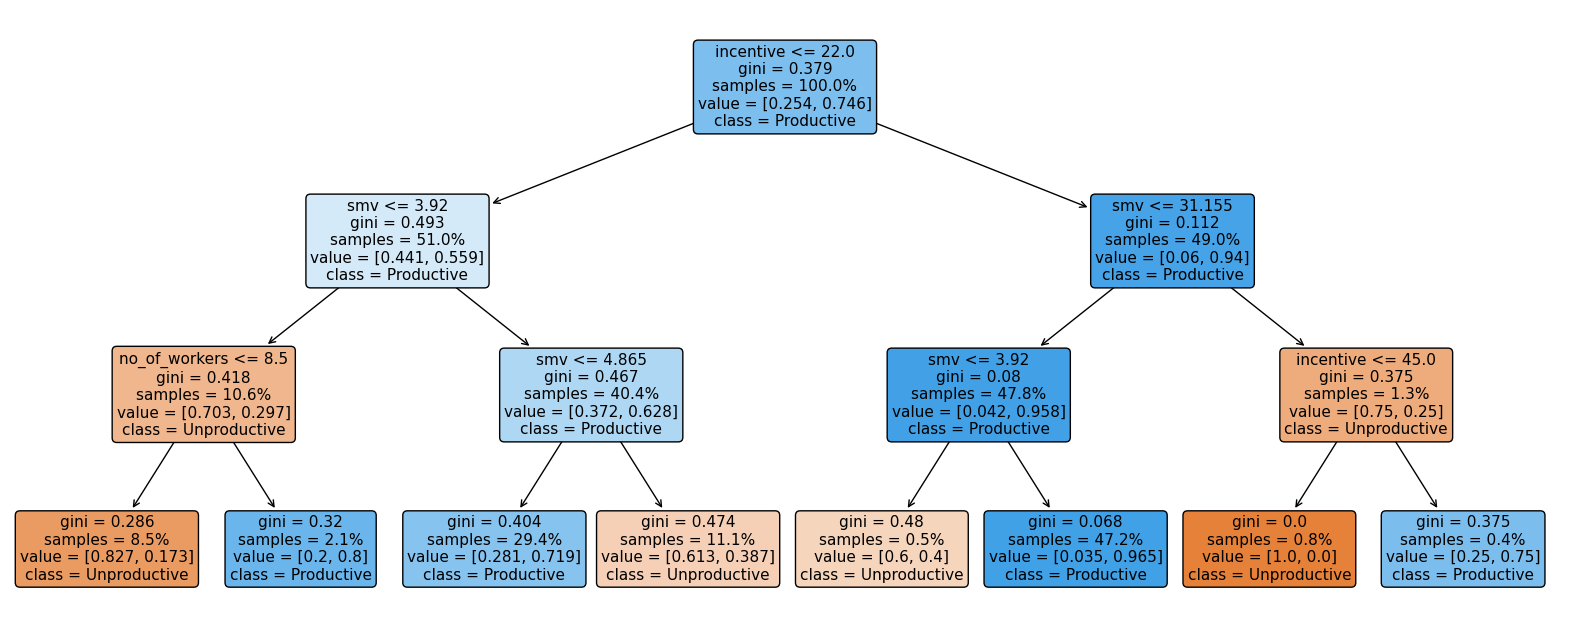

In [275]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=[20.0, 8.0])

# Plot the tree with specific parameters:
_ = plot_tree(tree, feature_names = X.columns,
              class_names = ['Unproductive', 'Productive'],
              filled = True, rounded = True, proportion = True, fontsize=11)

Here we present you a machine learning model for predictions on productivity called **Decision Tree**. The model consists of a square imagined as root at the top, divided into branches on its left and right, ending into leaves at the bottom as the predictions. This figure may seem complex at first, but don't worry we'll walk it through together. Let's go, shall we?

So this graphic gives us which aspect of the factory that impacts to someone's productivity. We're talking about the data, from `day`, `department`, `team_number`, etc. Everyone can look at the first line on each non-leaf squares, and you'll see  aspects that is filling the square frequently are **`smv`** (Standard Minute Value), a variable representing time allocated for a specific task, and **`incentive`**, the amount of financial incentive offered to the workers.

*But how do we take path from the root to the leaves?* **Good question.** So in short, the algorithm calculates each aspect and then finding out which one is best / the most optimal for splitting. It then divides each data to, in this case, the 8 leaves and determine if they are `Productive` or `Unproductive`. Let's start from top to bottom.

> On the root we have `incentive <= 22.0`, and suppose we have a data where `(incentive == 25)` which **doesn't fulfill the condition** or threshold--we call it non-cases. Ones that fulfill it (or **cases**) will branch to the **left**, and non-cases will branch to the **right**. Given the data that we have, we're going **RIGHT**.

>> Next we have `smv <= 31.155`, and our data has `(smv == 35)`, which again **does not fulfill the threshold**. Here we're going **RIGHT.**

>>> Now we've reached the leaves, we're put into one of eight total classes. We're at the **RIGHTEST** leaf and the group is included as class `Productive` (as written in the last line).

> The algorithm will classify the data with each optimal threshold they've decided and at last we'll have 8 classes with its *"verdict"*, so to speak.

And throughout these three months given the graphic, we can see that `smv` and `incentive` do have the strongest predictor for worker's productivity. 

## Using Random Forest

After explaining how the model works, your audience became excited about how predictive decision trees can be. And you figure you can increase the model accuracy to improve its performance. You've learned that this model has a modification called `RandomForestClassifier()`, where you pick not all but random samples across the dataset. This 

In [284]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(oob_score = True, random_state = 24)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print(f'Accuracy: {round(accuracy_score(y_test, y_pred_forest) * 100, 3)} %')
print(f'Out of Bag Score: {round(forest.oob_score_ * 100, 3)} %')

Accuracy: 86.667 %
Out of Bag Score: 83.386 %


The random forest generates an accuracy of `86.667%`--higher than previous model with `84.583%`. We also look for Out-Of-Bag Score (OOB), which in this model acts as the accuracy on test dataset left unobserved--out of the bag.